In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
import numpy as np

2022-12-02 11:03:28.449459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


60K observaciones, img de tamaño 28x28

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)
x_train = (x_train - mean_px)/(std_px)

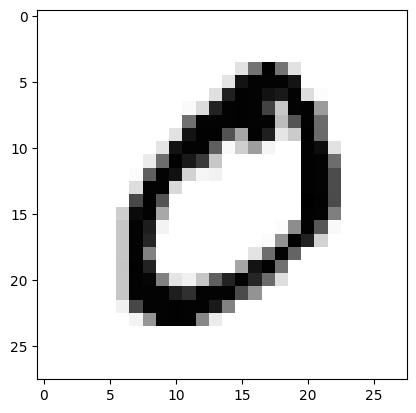

In [6]:
plt.imshow(x_train[1], cmap="Greys")

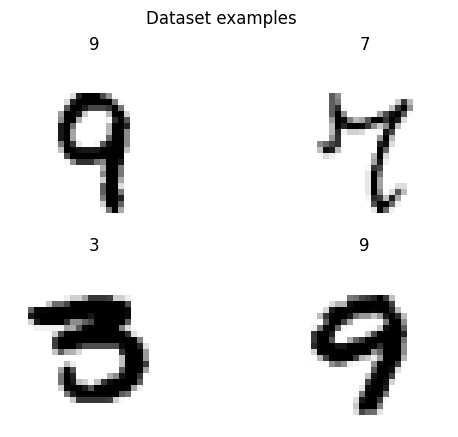

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Dataset examples')
test = np.random.randint(0,10000)
ax1.imshow(x_test[test], cmap="binary")
ax1.title.set_text(y_test[test])
ax1.axis('off')
ax2.imshow(x_test[test+1], cmap="binary")
ax2.title.set_text(y_test[test+1])
ax2.axis('off')
ax3.imshow(x_test[test+2], cmap="binary")
ax3.title.set_text(y_test[test+2])
ax3.axis('off')
ax4.imshow(x_test[test+3], cmap="binary")
ax4.title.set_text(y_test[test+3])
ax4.axis('off');

In [107]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [108]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [110]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("src/test_model.h5")

Epoch 1/10
469/469 [==============================] - 40s 85ms/step - loss: 0.6873 - accuracy: 0.7817 - val_loss: 8.5285 - val_accuracy: 0.9063
Epoch 2/10
469/469 [==============================] - 39s 84ms/step - loss: 0.3600 - accuracy: 0.8906 - val_loss: 6.7997 - val_accuracy: 0.9315
Epoch 3/10
469/469 [==============================] - 39s 84ms/step - loss: 0.3002 - accuracy: 0.9098 - val_loss: 4.5435 - val_accuracy: 0.9507
Epoch 4/10
469/469 [==============================] - 40s 84ms/step - loss: 0.2417 - accuracy: 0.9264 - val_loss: 5.0317 - val_accuracy: 0.9514
Epoch 5/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1992 - accuracy: 0.9408 - val_loss: 5.5096 - val_accuracy: 0.9477
Epoch 6/10
469/469 [==============================] - 40s 84ms/step - loss: 0.1707 - accuracy: 0.9488 - val_loss: 11.1621 - val_accuracy: 0.9180
Epoch 7/10
469/469 [==============================] - 40s 85ms/step - loss: 0.1499 - accuracy: 0.9545 - val_loss: 9.9223 - val_accuracy

In [112]:
model1 = keras.models.load_model('src/test_model.h5')

In [95]:
import imageio

In [97]:
im = imageio.imread("img/2.png")
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
gray = gray.reshape(1, 28, 28, 1)
gray /= 255

C:\Users\parra\AppData\Local\Temp\ipykernel_9416\3012896408.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("2.png")


In [98]:
prediction = model.predict(gray)
print(prediction.argmax())

1/1 [==============================] - 0s 18ms/step
2
